# Import packages

In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_validate , KFold , ShuffleSplit


import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator



%matplotlib inline

# Data Preprocessing

In [35]:
# Load data
data = pd.read_csv('data/unemployment_data.csv')
data

,Date,Unemployment_interpolated,Bank Interest Rate,Change_in_GDP,Unemployment,CPI_all-items,CPI_food,CPI_shelter,CPI_household_op,CPI_clothing,...,ITSE_transport,ITSE_gov,ITSB_total,ITSB_commercial,ITSB_travel,ITSB_transport,ITSB_gov,HPI_total,HPI_house,HPI_land
0,1976-01,7.100,9.000000,4.673333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-02,7.175,9.000000,6.036667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1976-03,7.250,9.391304,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1976-04,7.325,9.500000,7.770000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1976-05,7.400,9.500000,8.140000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2023-10,NaN,5.250000,NaN,5.3,158.6,186.3,176.3,131.2,95.9,...,1697.0,150.0,43.0,175.0,1132.0,-1257.0,-7.0,124.7,127.6,116.9
574,2023-11,NaN,5.250000,NaN,5.3,159.0,186.8,177.1,131.1,96.4,...,1560.0,147.0,-482.0,248.0,651.0,-1375.0,-7.0,124.4,127.2,116.8
575,2023-12,NaN,5.250000,NaN,5.3,159.5,187.6,177.8,130.8,96.9,...,1615.0,146.0,319.0,528.0,949.0,-1152.0,-6.0,124.4,127.2,116.8
576,2024-01,NaN,5.250000,NaN,6.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Check available features, data types, number of samples available

column_info = []
for column, dtype in data.dtypes.items():
    entries = data[column].count()  # Count non-null entries in the column
    column_info.append([column, dtype, entries])

# Create a DataFrame from the list
column_info_df = pd.DataFrame(column_info, columns=["Feature", "Data Type", "Number of Samples"])

# Print the DataFrame
pd.set_option('display.max_rows', None)
column_info_df


,Feature,Data Type,Number of Samples
0,Date,object,578
1,Unemployment_interpolated,float64,565
2,Bank Interest Rate,float64,578
3,Change_in_GDP,float64,573
4,Unemployment,float64,157
5,CPI_all-items,float64,384
6,CPI_food,float64,384
7,CPI_shelter,float64,384
8,CPI_household_op,float64,384
9,CPI_clothing,float64,384


In [37]:
# Drop FEX columns because there is insufficient data
data = data.drop(data.filter(regex='^FEX').columns, axis=1)

# Drop Unemployment_interpolated
data = data.drop('Unemployment_interpolated', axis=1)

# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])  
data.set_index('Date', inplace=True)

# Remove NaN
data.dropna(how='any', inplace=True)
pd.set_option('display.max_rows', 15)
data

,Bank Interest Rate,Change_in_GDP,Unemployment,CPI_all-items,CPI_food,CPI_shelter,CPI_household_op,CPI_clothing,CPI_transportation,CPI_health,...,ITSE_transport,ITSE_gov,ITSB_total,ITSB_commercial,ITSB_travel,ITSB_transport,ITSB_gov,HPI_total,HPI_house,HPI_land
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.250000,4.053333,8.3,118.4,124.6,124.5,109.8,91.0,123.2,116.0,...,940.0,128.0,-2330.0,315.0,-1766.0,-897.0,18.0,88.6,87.0,92.1
2011-02-01,1.250000,3.516667,8.2,118.3,124.7,124.5,109.8,90.5,123.3,116.2,...,890.0,130.0,-1874.0,353.0,-1434.0,-813.0,20.0,89.0,87.3,92.4
2011-03-01,1.250000,2.980000,8.4,119.1,126.8,124.6,110.3,91.6,124.2,116.7,...,1027.0,129.0,-3060.0,379.0,-2457.0,-1003.0,21.0,89.0,87.4,92.3
2011-04-01,1.250000,2.240000,8.2,119.6,127.0,125.2,109.6,90.9,125.7,116.9,...,1048.0,125.0,-3128.0,253.0,-2397.0,-1005.0,21.0,89.2,87.8,92.4
2011-05-01,1.250000,1.500000,7.7,120.0,127.5,125.2,110.2,92.3,126.6,116.9,...,1157.0,125.0,-2232.0,279.0,-1689.0,-844.0,22.0,89.6,88.2,92.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.750000,1.723333,5.2,156.1,184.0,170.6,132.6,96.4,165.8,145.7,...,1663.0,152.0,-3172.0,500.0,-2319.0,-1355.0,1.0,124.9,128.3,116.6
2023-06-01,4.943182,1.350000,5.2,156.5,184.5,171.4,132.0,96.3,167.4,146.2,...,1738.0,153.0,-921.0,703.0,-472.0,-1151.0,-1.0,125.0,128.3,116.7
2023-07-01,5.162500,0.550000,5.9,157.4,185.1,172.6,131.7,96.5,169.2,146.3,...,1801.0,156.0,-1344.0,452.0,-794.0,-996.0,-6.0,124.9,128.2,116.7


# Plot Unemployment Data over Time

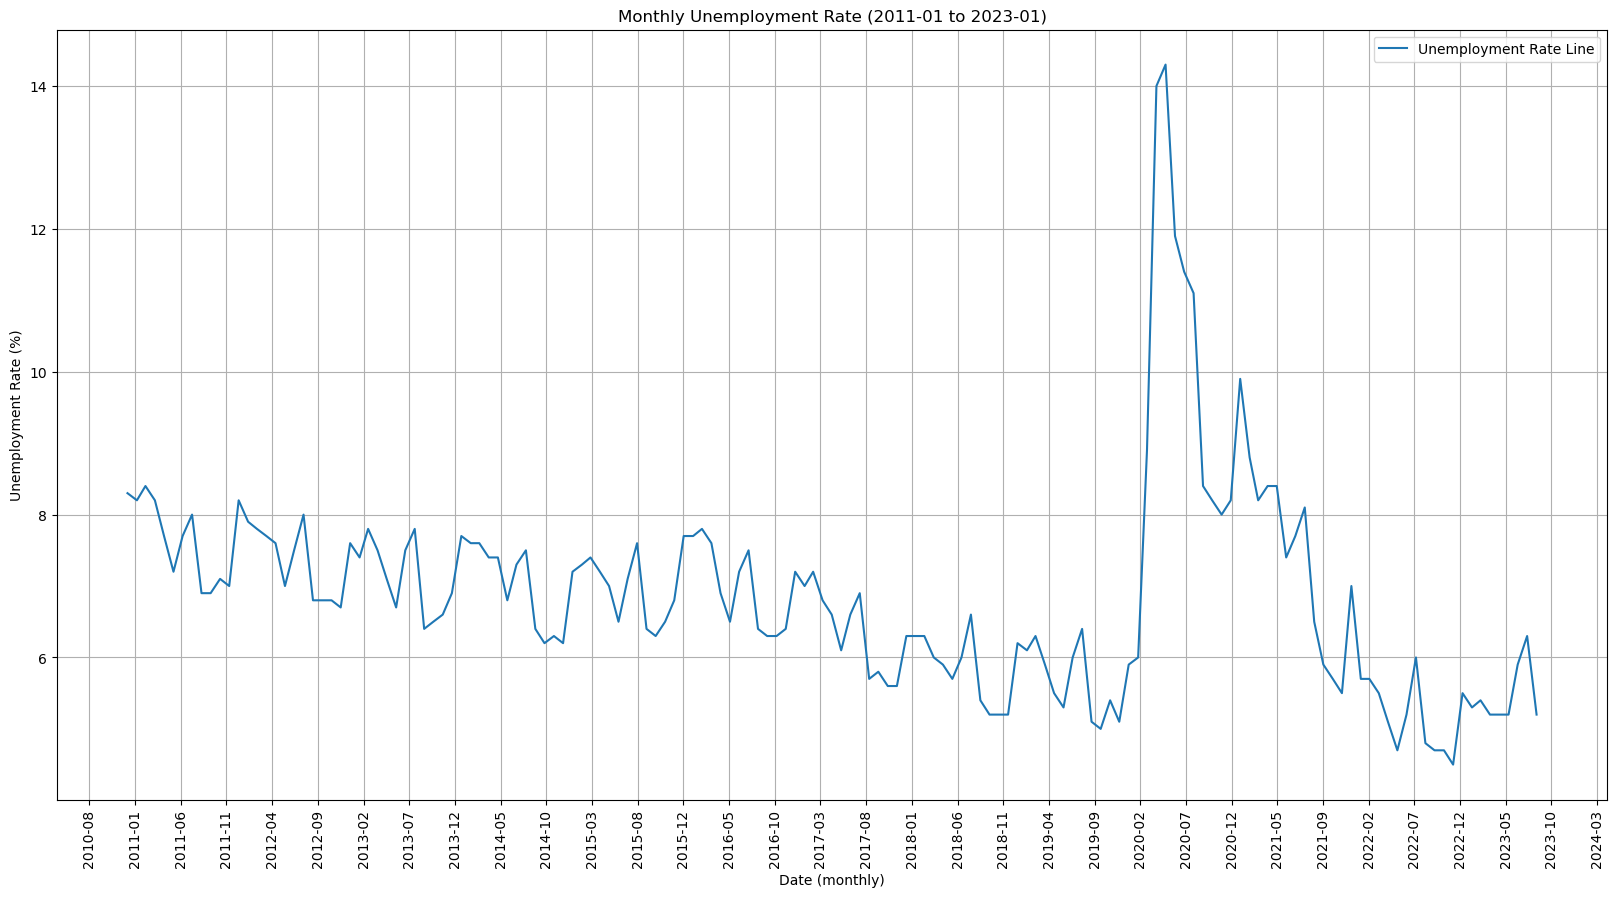

In [38]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(data.index,data["Unemployment"],label='Unemployment Rate Line')
# plt.xticks(df["ds"],rotation=90)

ax.set(xlabel='Date (monthly)', ylabel='Unemployment Rate (%)',
       title='Monthly Unemployment Rate (2011-01 to 2023-01)')
ax.grid(True)
plt.legend()

plt.xticks(data.index,rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=50))  # Adjust the number of bins as needed

plt.show()

# Split the data

In [39]:
y = data['Unemployment']
X = data.drop(['Unemployment'],axis=1)

# Random Split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

# No shuffle. The beginning 80% of the data is used for training. The last 20% of the data is used for testing. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False)



# Predict Unemployment using only GDP
## Find the best polynomial model degree using 5-Fold CV

In [40]:
MSEs = []
# Fit model and collect performance iteratively
for i in range(1,40):
    # Fit a Linear Regression model
    poly   = PolynomialFeatures (degree=i, include_bias=False)
    X_poly = poly.fit_transform(X['GDP'].to_numpy().reshape(-1,1))
    
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate performance
    mse_avg = -cv_results['test_score'].mean()
    MSEs.append(mse_avg)    

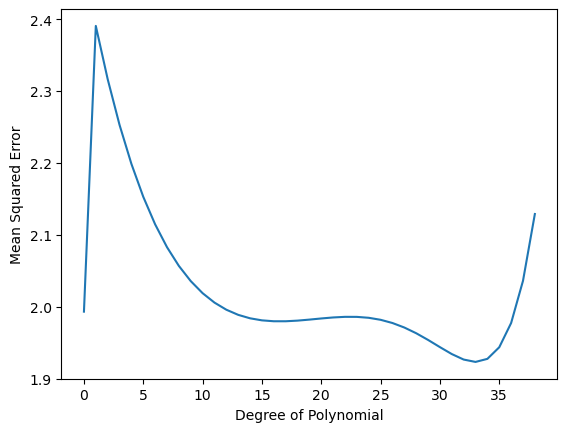

In [41]:
# Plot MSE vs Degree of Polynomial
MSEs = pd.DataFrame(MSEs, columns=['MSE'])

MSEs.plot(legend=False)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.show()



In [42]:
# Determine the degree that gives the minimum MSE
min_mse_degree = MSEs['MSE'].idxmin()
min_mse_row = MSEs[MSEs['MSE'] == MSEs['MSE'].min()].rename_axis('Degree')


,MSE
33,1.923325


## Plot the fit of polynomial regression

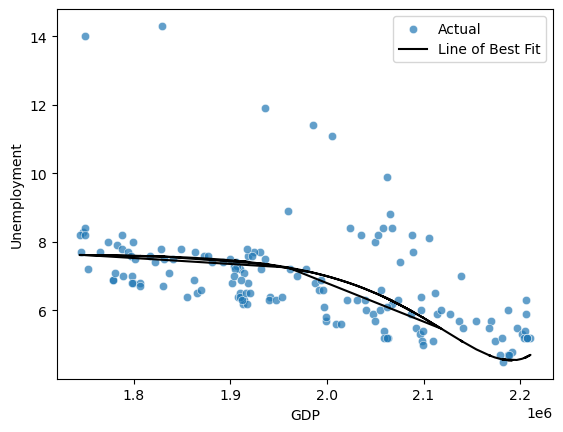

In [43]:
# Fit the model based in the degree that gives minimum MSE
poly         = PolynomialFeatures (degree=min_mse_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train['GDP'].to_numpy().reshape(-1,1))

lm = LinearRegression()
lm = lm.fit(X_train_poly, y_train)

x    = poly.transform(X['GDP'].to_numpy().reshape(-1,1))
preds = lm.predict(x)


# Plot the scatterplot
sns.scatterplot(data=data, x="GDP", y="Unemployment", label='Actual', alpha=0.7)


# Add predictions
plt.plot(X[['GDP']],preds,c='black', label="Line of Best Fit")

plt.legend(['Actual', 'Line of Best Fit'])



In [44]:
# Predict unemployment on the test set
x_test     = poly.transform(X_test['GDP'].to_numpy().reshape(-1,1))
test_preds = lm.predict(x_test)

pred_based_on_GDP = pd.DataFrame(index=X_test.index, data=test_preds, columns=['Predicted_Unemployment_Based_on_GDP'])
pred_based_on_GDP

,Predicted_Unemployment_Based_on_GDP
Date,
2021-03-01,5.968973
2021-04-01,6.285489
2021-05-01,6.405870
2021-06-01,6.157852
2021-07-01,5.959983
...,...
2023-05-01,4.705261
2023-06-01,4.650347
2023-07-01,4.631624


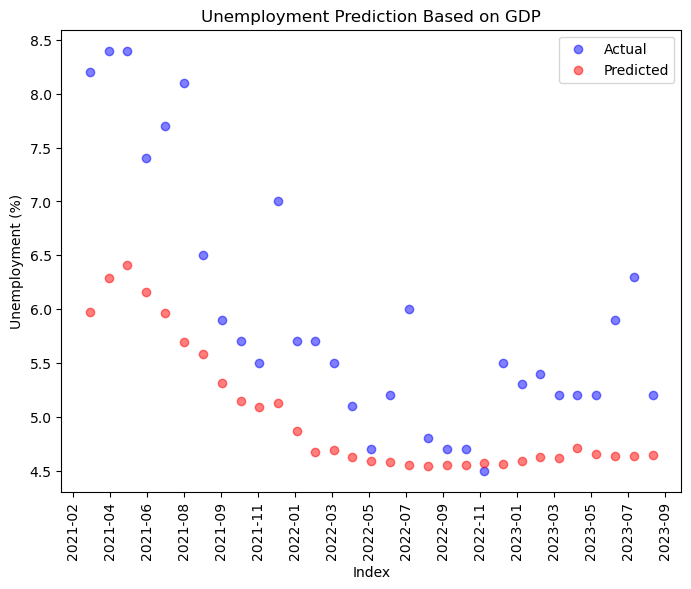

In [45]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(pred_based_on_GDP.index, pred_based_on_GDP, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Unemployment (%)')
plt.title('Unemployment Prediction Based on GDP')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of bins as needed

plt.xticks(rotation=90)


plt.show()



# Predict Unemployment by Multiple Linear Regression

In [46]:
# model = LinearRegression()
# model = model.fit(X_train,y_train)

# # Evaluate Performance
# preds = model.predict(X_test)
# mse   = mean_squared_error(y_test,preds)

# print(f"MSE: {mse}")

MSEs = []
# Fit model and collect performance iteratively
for i in range(1,5):
    # Fit a Linear Regression model
    poly   = PolynomialFeatures (degree=i, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate performance
    mse_avg = -cv_results['test_score'].mean()
    MSEs.append(mse_avg)
    print(f"degree={i}, mse={mse_avg}")    

degree=1, mse=9.409557163238457
degree=2, mse=3.4092022718226622
degree=3, mse=3.631343281370205
degree=4, mse=4.029365601333811


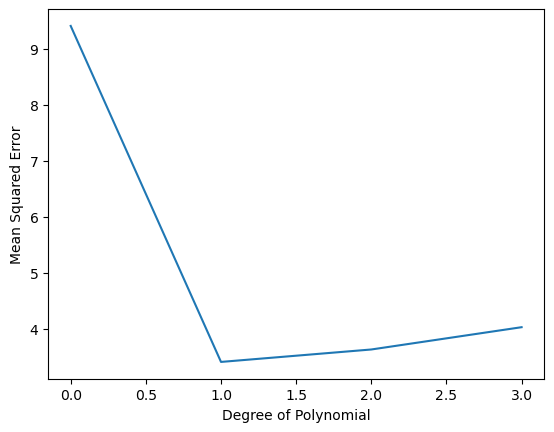

In [47]:
MSEs = pd.DataFrame(MSEs, columns=['MSE'])

MSEs.plot(legend=False)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.show()



In [48]:
poly         = PolynomialFeatures (degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

lm = LinearRegression()
lm = lm.fit(X_train_poly, y_train)

x_test    = poly.transform(X_test)
test_preds = lm.predict(x_test)

pred_multi = pd.DataFrame(index=X_test.index, data=test_preds, columns=['Predicted_Unemployment_Multiple_LinReg'])
pred_multi



,Predicted_Unemployment_Multiple_LinReg
Date,
2021-03-01,8.087353
2021-04-01,6.983210
2021-05-01,7.492718
2021-06-01,6.923392
2021-07-01,6.201486
...,...
2023-05-01,-4.202569
2023-06-01,-5.644361
2023-07-01,-4.417583


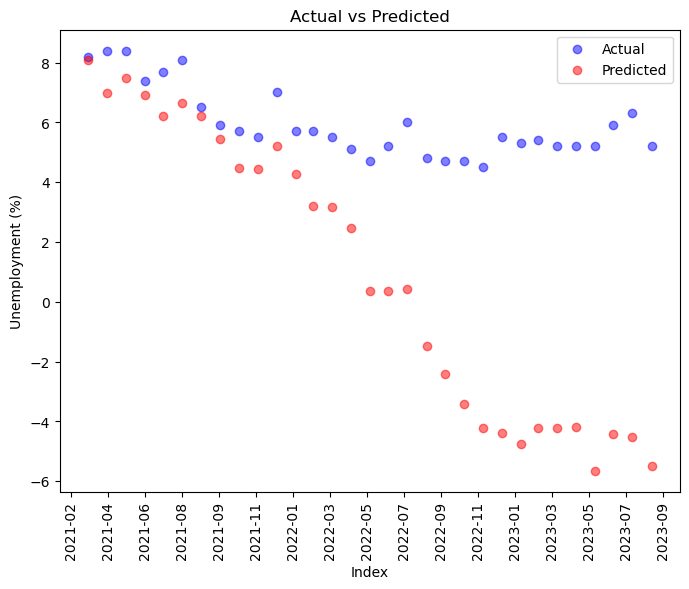

In [49]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(pred_multi.index, pred_multi, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Unemployment (%)')
plt.title('Actual vs Predicted')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of bins as needed

plt.xticks(rotation=90)


plt.show()